<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/googlenet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from keras.applications import VGG19
from tqdm import tqdm

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
import cv2
import gc
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def cng(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=convert_1(np.asarray(df['label']))
  img=np.asarray(df['image'])
  img1=[]
  for i in range(len(img)):
        img1.append(cng(img[i]))
  img1=np.asarray(img1)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],299,299,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],299,299,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [0]:
import scipy.io
import numpy as np
from tqdm import tqdm
from keras.applications import *
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from keras.optimizers import *
from keras.models import Model
from keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


  0%|          | 0/5 [00:00<?, ?it/s]

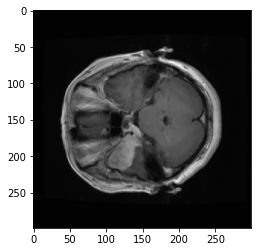

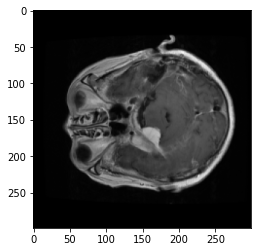

Epoch 1/10
2522/2522 [==============================] - 55s 22ms/step - loss: 0.2346 - accuracy: 0.9112
Epoch 2/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0739 - accuracy: 0.9730
Epoch 3/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0503 - accuracy: 0.9814
Epoch 4/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0254 - accuracy: 0.9901
Epoch 5/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0371 - accuracy: 0.9877
Epoch 6/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 7/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 8/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0236 - accuracy: 0.9913
Epoch 9/10
2522/2522 [==============================] - 35s 14ms/step - loss: 0.0280 - accuracy: 0.9893
Epoch 10/10
2522/2522 [==============================] - 35s 14m


 20%|██        | 1/5 [07:08<28:34, 428.73s/it]

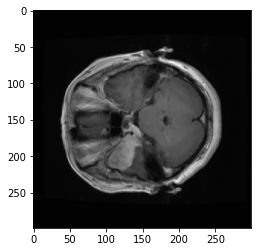

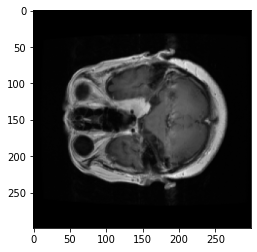

Epoch 1/10
2385/2385 [==============================] - 54s 23ms/step - loss: 0.2662 - accuracy: 0.9010
Epoch 2/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0851 - accuracy: 0.9673
Epoch 3/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0300 - accuracy: 0.9916
Epoch 4/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0371 - accuracy: 0.9878
Epoch 5/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0521 - accuracy: 0.9824
Epoch 6/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0269 - accuracy: 0.9920
Epoch 7/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 8/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0252 - accuracy: 0.9904
Epoch 9/10
2385/2385 [==============================] - 33s 14ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 10/10
2385/2385 [==============================] - 33s 14m


 40%|████      | 2/5 [14:05<21:15, 425.06s/it]

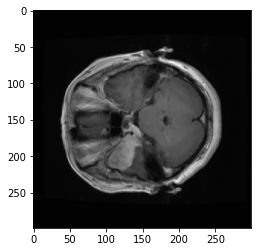

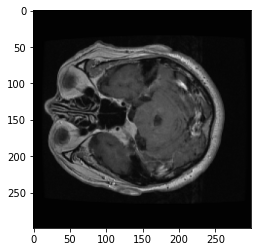

Epoch 1/10
2492/2492 [==============================] - 56s 22ms/step - loss: 0.2681 - accuracy: 0.9001
Epoch 2/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0756 - accuracy: 0.9719
Epoch 3/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0731 - accuracy: 0.9783
Epoch 4/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0274 - accuracy: 0.9920
Epoch 5/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0254 - accuracy: 0.9924
Epoch 6/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0215 - accuracy: 0.9920
Epoch 7/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 8/10
2492/2492 [==============================] - 35s 14ms/step - loss: 0.0122 - accuracy: 0.9964
Epoch 9/10
2492/2492 [==============================] - 34s 14ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 10/10
2492/2492 [==============================] - 34s 14m


 60%|██████    | 3/5 [21:16<14:13, 426.88s/it]

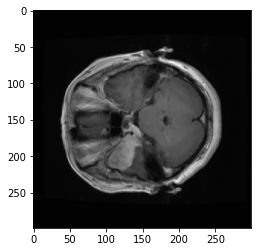

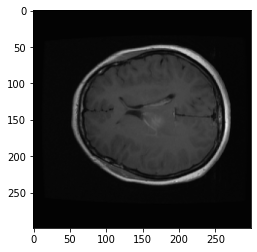

Epoch 1/10
2436/2436 [==============================] - 55s 23ms/step - loss: 0.2518 - accuracy: 0.9031
Epoch 2/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.1376 - accuracy: 0.9507
Epoch 3/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0338 - accuracy: 0.9889
Epoch 4/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0455 - accuracy: 0.9832
Epoch 5/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0423 - accuracy: 0.9873
Epoch 6/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 7/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 8/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0158 - accuracy: 0.9975
Epoch 9/10
2436/2436 [==============================] - 34s 14ms/step - loss: 0.0042 - accuracy: 0.9992
Epoch 10/10
2436/2436 [==============================] - 34s 14m


 80%|████████  | 4/5 [28:21<07:06, 426.44s/it]

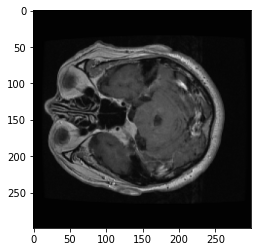

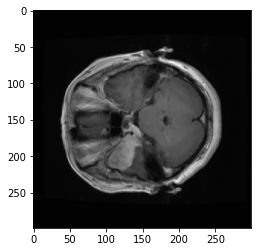

Epoch 1/10
2421/2421 [==============================] - 55s 23ms/step - loss: 0.2342 - accuracy: 0.9108
Epoch 2/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0670 - accuracy: 0.9777
Epoch 3/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0388 - accuracy: 0.9872
Epoch 4/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 5/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0222 - accuracy: 0.9938
Epoch 6/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0279 - accuracy: 0.9922
Epoch 7/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0229 - accuracy: 0.9942
Epoch 8/10
2421/2421 [==============================] - 34s 14ms/step - loss: 0.0230 - accuracy: 0.9909
Epoch 9/10
2421/2421 [==============================] - 33s 14ms/step - loss: 0.0383 - accuracy: 0.9888
Epoch 10/10
2421/2421 [==============================] - 33s 14m


100%|██████████| 5/5 [35:30<00:00, 426.04s/it]


In [8]:
from keras.callbacks import *
import gc
import keras
from keras.layers import *
from keras import backend as K
gc.collect()
K.clear_session()
class ck(Callback):
    def __init__(self):
        self.max=756
        self.lr=1
        self.count=1
        self.loss=[]
        self.lrs=[]
    def on_epoch_end(self,epoch,logs=None):
        self.loss.append(logs.get('loss'))
        self.count+=1
    def on_epoch_begin(self,epoch,logs=None):
        lr=self.lr-self.count*(1-1e-6)/756
        self.lrs.append(lr)
        K.set_value(self.model.optimizer.lr, lr)
final_result=[]
preds=[]
answers=[]
history=[]
for index in tqdm(range(1,6)):
  K.clear_session()
  ep=50
  gc.collect()
  trn,tst=get_trn_tst(df,index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()
  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  del([trn,tst])
  gc.collect()
  mod=InceptionV3(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)
  model.compile(optimizer=Adam(3e-4), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  gc.collect()



  #training the model
  hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=10)
  history.append(hist.history)
  pre=model.predict(tst_x)
  preds.append(pre)
  answers.append(tst_y)
  del([trn_x,tst_x,model])
  gc.collect()
  final_result.append(accuracy_score(tst_y,np.argmax(pre,1)))
  gc.collect()

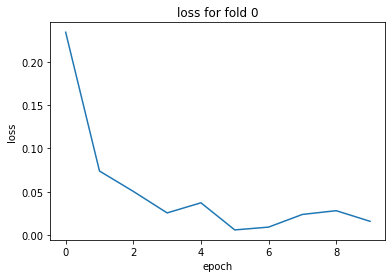

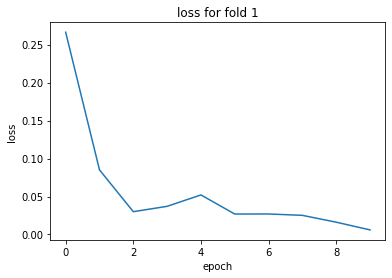

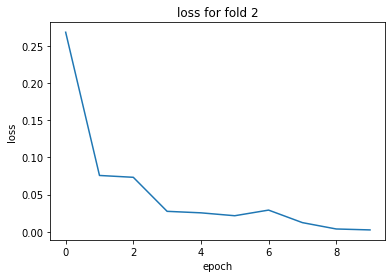

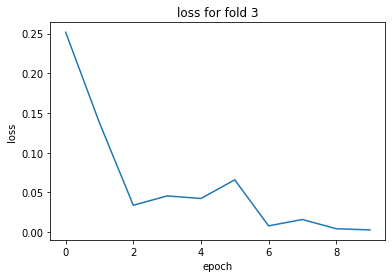

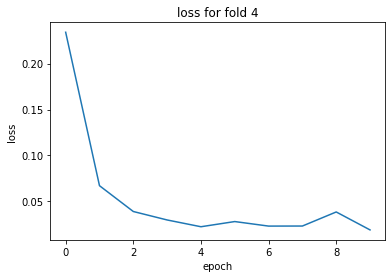

In [9]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

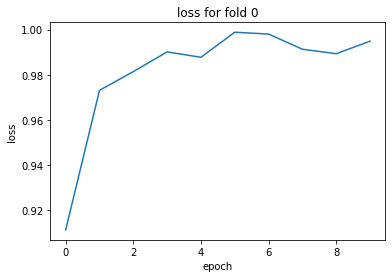

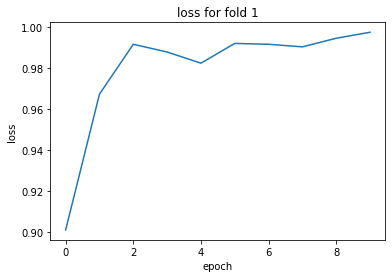

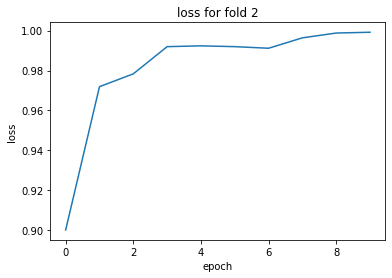

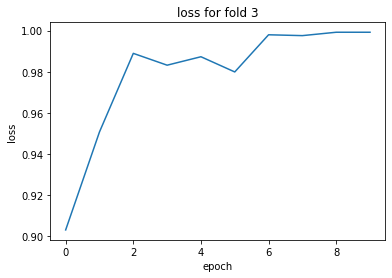

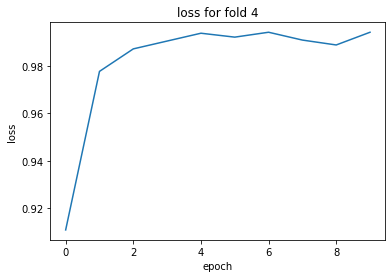

In [10]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [11]:
np.mean(final_result)

0.9200256241985304

In [0]:
cm=[]
for i in preds:
  cm.append(np.argmax(i,1))

In [0]:
from sklearn.metrics import confusion_matrix
conf=[]
for i in range(len(cm)):
  conf.append(confusion_matrix(answers[i],cm[i]))

In [14]:
conf[0]

array([[109,   3,   0],
       [ 17, 228,   0],
       [ 52,   7, 126]])

In [15]:
conf[1]

array([[130,  31,   6],
       [  3, 334,   1],
       [  5,  12, 157]])

In [16]:
conf[2]

array([[126,   4,   9],
       [ 28, 203,   0],
       [  0,   0, 202]])

In [17]:
conf[3]

array([[116,   4,   4],
       [  1, 324,   0],
       [  7,   0, 172]])

In [18]:
conf[4]

array([[137,  10,  19],
       [  7, 280,   0],
       [  4,   6, 180]])